<a href="https://colab.research.google.com/github/helder-garcia/neural-networks-practice/blob/main/Neural_Networks_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)
import matplotlib.pyplot as plt

cuda


In [2]:
from sklearn import datasets
features = [0, 5]
wine = datasets.load_wine()
data = wine.data[:, features]
target = wine.target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

Text(0, 0.5, 'total_phenols')

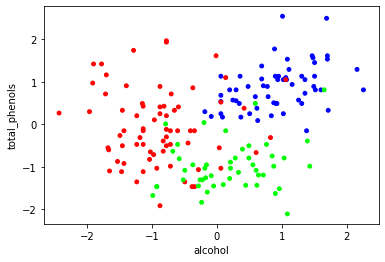

In [3]:
plt.scatter(data[:, 0], data[:, 1], s=15, c=target, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

In [4]:
class wineClassifier(nn.Module):
  def __init__(self, input_size, hidden_size, out_size):
    super(wineClassifier, self).__init__()
    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, X):
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))
    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names)
net = wineClassifier(input_size, hidden_size, out_size).to(device)

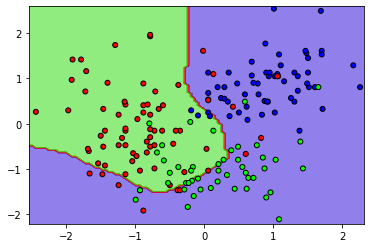

In [5]:
import numpy as np

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

plot_boundary(data, target, net)

In [6]:
from torch import optim
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)
criterion = nn.CrossEntropyLoss().to(device)
xTensor  = torch.FloatTensor(data).to(device)
yTensor  = torch.LongTensor(target).to(device)

In [7]:
for i in range(1000):
  # Forward
  pred = net(xTensor)
  loss = criterion(pred, yTensor)
  # Backward
  loss.backward()
  optimizer.step()

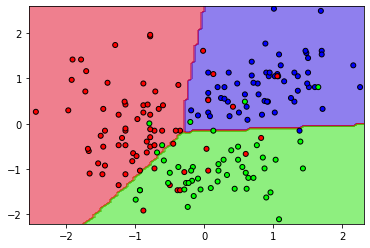

In [8]:
plot_boundary(data, target, net)